# Comparison Example

In this notebook, we show some examples of comparisons between simulations of theoretical models and experimental data, being this the main goal of our software in the long term. 

This aspect of the NeuralPlayground (NPG) software is still under development. With time, we want to implement tools exclusively made to compare simulated and experimental data, such as a GUI to quickly navigate through the results, add more metrics to measure the performance of agents or similarity between neural representation.

For now, this notebook uses the three main modules of NPG, "experiments", "arenas" and "agents", to simulate theoretical models and compare with what is seen in neural recording from real experiments.  The "simulation manager" is used to run and keep track of the state of all of your runs and available results (For ease, the results of the simulations are saved on the gin repository and fetched). 
We use the gridscore metric implemented in the framework, to compare the performance of the different model implemented as well as direct visual comparison. 

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
import os
import matplotlib.pyplot as plt

from neuralplayground.experiments import Wernle2018Data, Hafting2008Data, Sargolini2006Data
from neuralplayground.comparison import GridScorer
from neuralplayground.arenas import Simple2D, ConnectedRooms,Wernle2018, MergingRoom, Sargolini2006
from neuralplayground.agents import Weber2018, Stachenfeld2018
from neuralplayground.experiments import Wernle2018Data, Hafting2008Data
from neuralplayground.saved_models import fetch_model_path
from neuralplayground.plotting.plot_utils import make_plot_trajectories , make_plot_rate_map, make_agent_comparison

# Different Agents in Same environement

We compare two agents in the same environement and compare their neural representations. We will take the Successor Representation model (SR) by Stachenfeld et al. 2017, and a plasticity model from Weber et al. 2018, and compare it againts Sargolini et al. 2006. The runs have been previoulsy run using the simulation manager, the output was saved to the gin repositiory for ease.

**It might take a while to fetch trained models from [Gin](https://gin.g-node.org/SainsburyWellcomeCentre/NeuralPlayground), possibly enough time to make yourself a coffee**.

In [2]:
sr_data_path = fetch_model_path("stachenfeld_2018_in_sargolini2006")
weber_data_path = fetch_model_path("weber_2018_in_sargolini2006")

No we have both models locally, we can load them as using pickle package, the loaded variables correspond object instances of the trained agent and arena with their respective attributes and methods.

In [3]:
agent_sr = pd.read_pickle(os.path.join(sr_data_path, "agent"))
param_sr = pd.read_pickle(os.path.join(sr_data_path, "params.dict"))
env = pd.read_pickle(os.path.join(sr_data_path, "arena"))

print("agent_sr", agent_sr)
print("arena", env)

agent_sr <neuralplayground.agents.stachenfeld_2018.Stachenfeld2018 object at 0x7fd3ebc8aed0>
arena <Sargolini2006 instance>


You can ask for the documentation of any of these objects directly in the notebook by running, for example,
``` help(agent_sr) ``` to get the docstring with methods and attribute description

In [4]:
agent_weber = pd.read_pickle(os.path.join(weber_data_path, "agent"))
param_weber = pd.read_pickle(os.path.join(weber_data_path, "params.dict"))

print("agent_weber", agent_sr)

agent_weber <neuralplayground.agents.stachenfeld_2018.Stachenfeld2018 object at 0x7fd3ebc8aed0>


### Comparison function
Once you have a set of agents, arenas and experiments you'd like to compare, ideally you wouldn't want to write all to code from scratch to see your results. If these objects to compare follow the proper format, then one simple tool you can use is ``` make_agent_comparison ``` function, which will summarize the results, in this case, it is focused on grid cell representation of the two models we are using, but we hope to extend it to work on other phenomena (and make it more pretty as well). Let's see how to use this function and built its inputs accordingly...

In [5]:
help(make_agent_comparison)

Help on function make_agent_comparison in module neuralplayground.plotting.plot_utils:

make_agent_comparison(envs, parameters, agents, exps=None, recording_index=None, tetrode_id=None, GridScorer=None)
    Plot function to compare agents in a given environment
    
    Parameters
    ----------
    envs:
        Arena environment where the agent was trained and tested
    parameters:
        List of dictionaries with the parameters of the environment and agent
    agents:
        List of agents to compare
    exp:
        Objects of the class Experiment to compare with the agent
        If None, the experimental data is will be searched in the environment
    recording_index: int
        Index of the recording to plot
    tetrode_id:
        Tetrode id to plot, as in Hafting and Sargolini experiment classes
    GridScorer:
        Object of the class Gridscore (or custom gridscore routine) to compute the grid scores
    
    Returns
    -------
    ax: mpl.axes._subplots.AxesSubplot (

In [6]:
# We format our agents and parameters in lists
agents = [agent_sr, agent_weber]
parameters = [param_sr, param_weber]

# Let's use an experimental class directly and give it to the function
exp = Sargolini2006Data(verbose=False)
env = [env, ]

/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:120: RuntimeWarning: invalid value encountered in sqrt
  mapStd = np.sqrt((sumOfSquares_x * N) - sums_x**2)
/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])


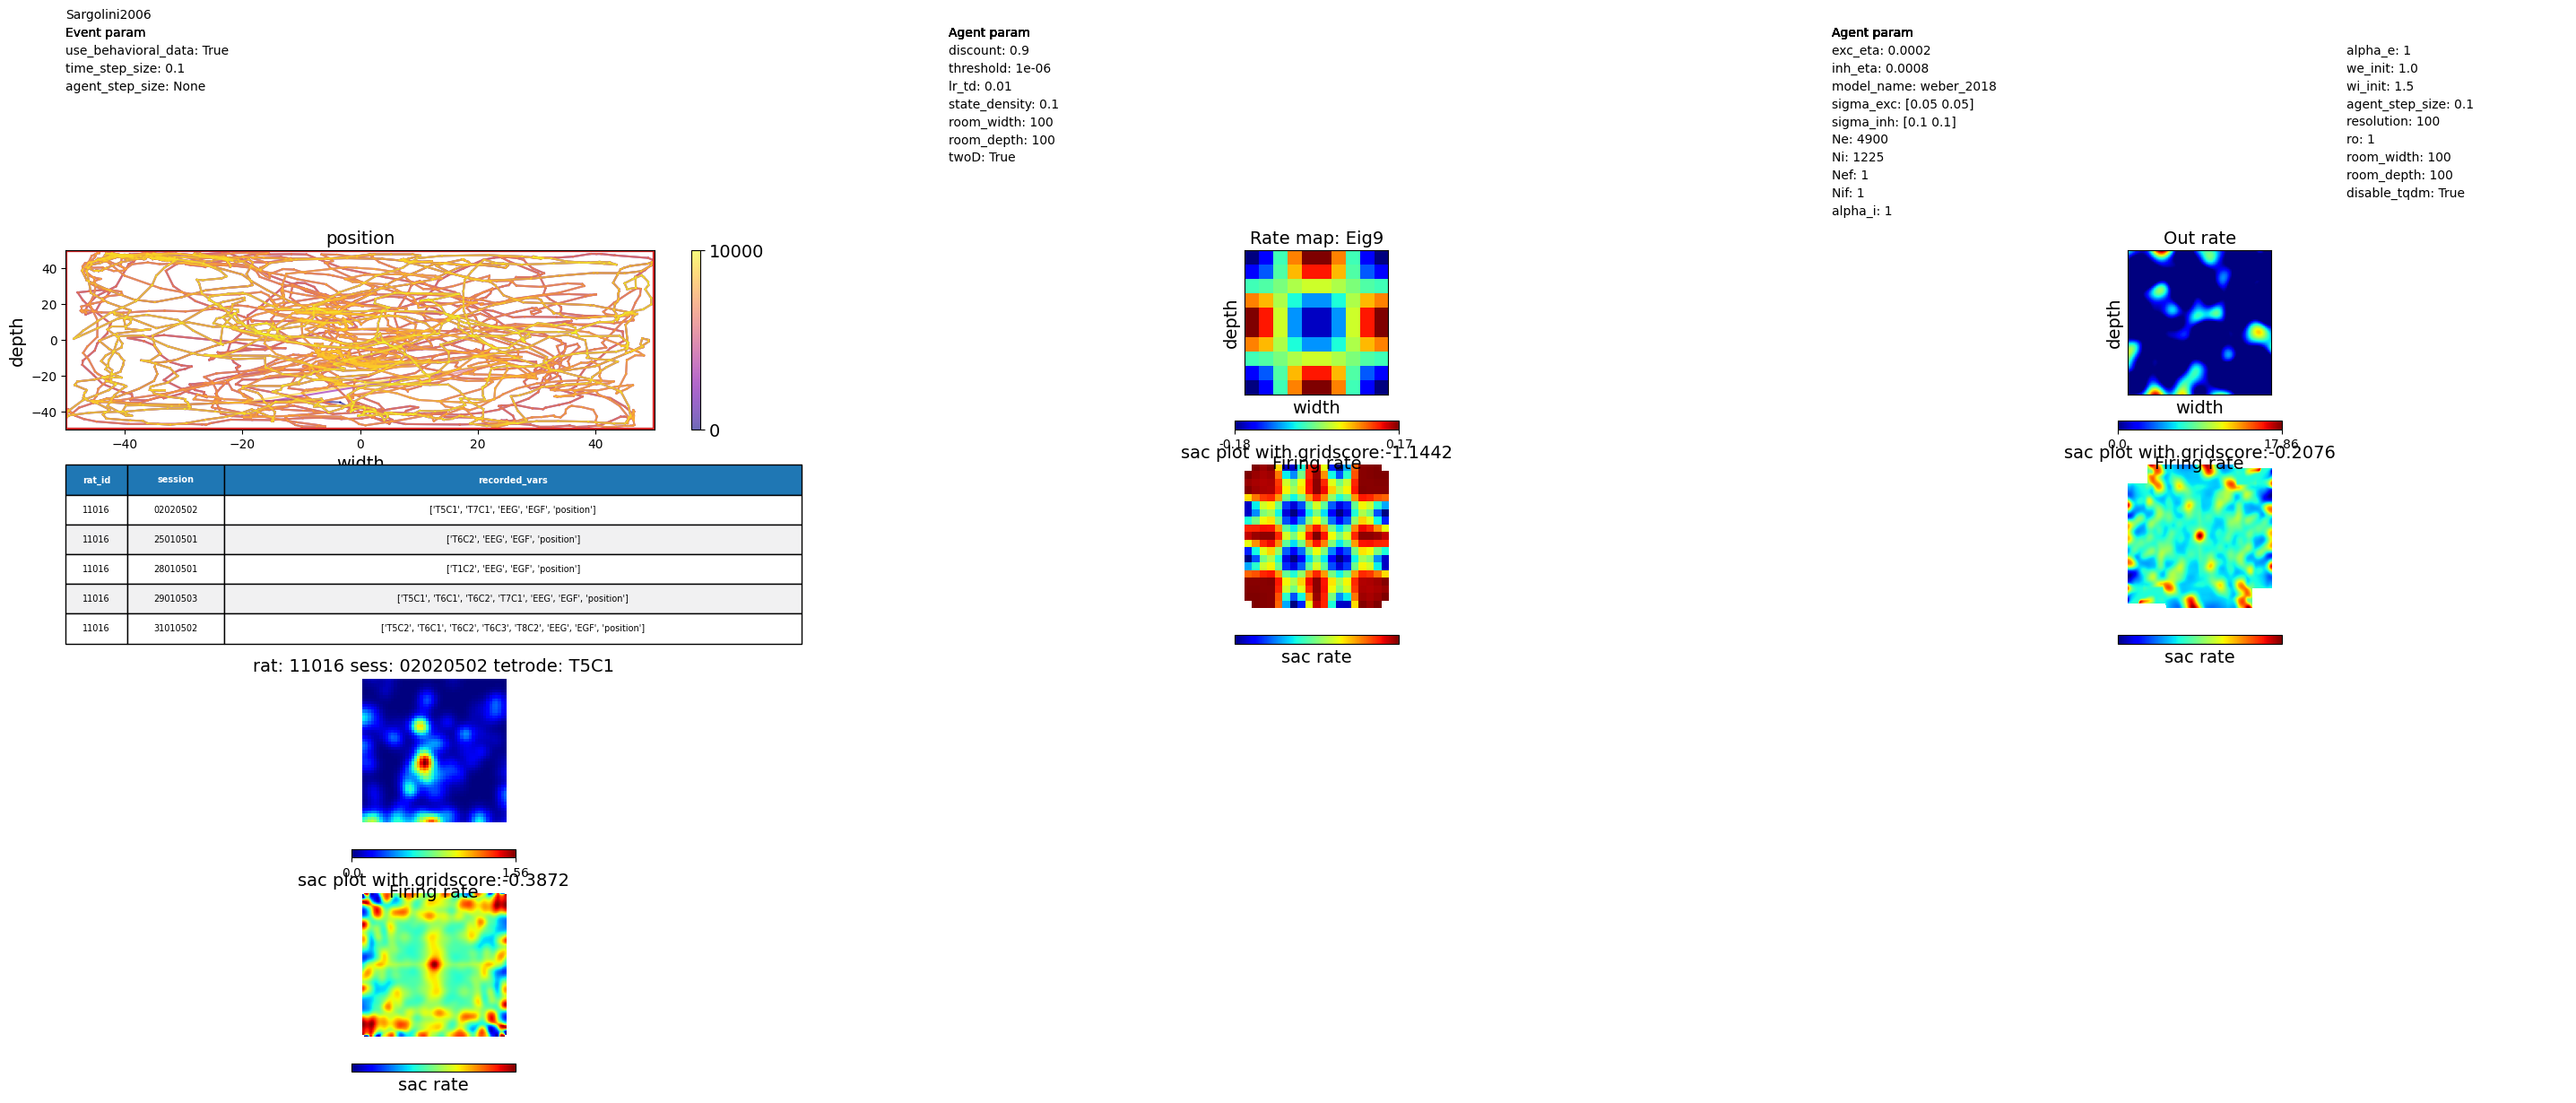

In [7]:
ax = make_agent_comparison(env, parameters, agents, recording_index=0, GridScorer=GridScorer)

## Comparison from run agent

Here the agents are directly trained bellow and their results sent to be used in the comparison plots.

array([[<Axes: >, <Axes: >],
       [<Axes: >,
        <Axes: title={'center': 'Rate map: Eig18'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-0.4953'}, xlabel='width', ylabel='depth'>]],
      dtype=object)

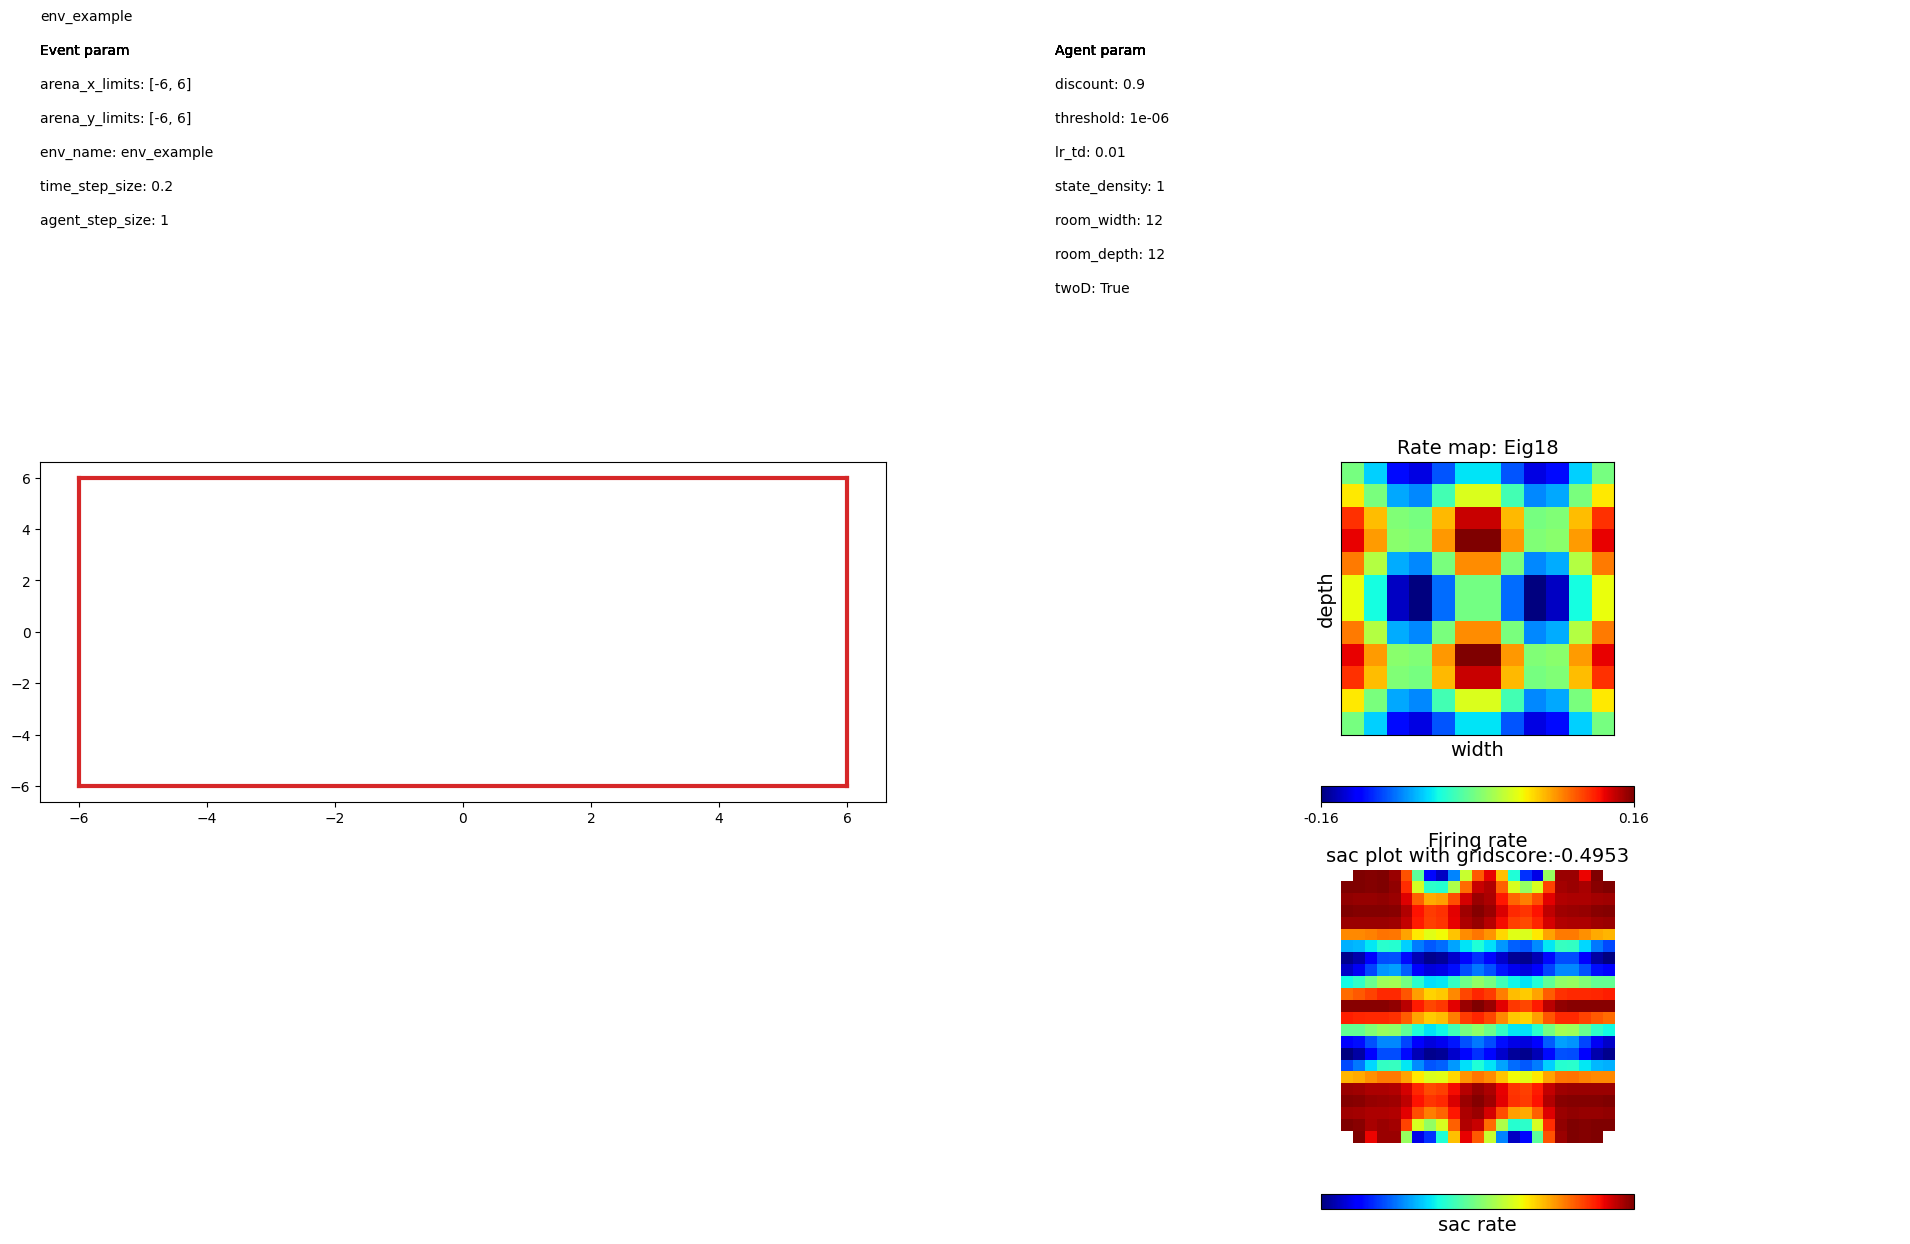

In [8]:
from neuralplayground.agents import  Stachenfeld2018, Weber2018
from neuralplayground.arenas import Simple2D, MergingRoom, Sargolini2006, Hafting2008, BasicSargolini2006,Wernle2018
from neuralplayground.backend import default_training_loop, episode_based_training_loop


stachenfeld_in_2d_params = {
    "simulation_id": "stachenfeld_2018_in_simple2D",
    "agent_class": Stachenfeld2018,
    "env_class": Simple2D,
    "env_params": {
        "arena_x_limits": [-6, 6],
        "arena_y_limits": [-6, 6],
        "env_name": "env_example",
        "time_step_size": 0.2,
        "agent_step_size": 1,
    },
    "agent_params": {
        "discount": 0.9,
        "threshold": 1e-6,
        "lr_td": 1e-2,
        "state_density": 1,
        "room_width": 12,
        "room_depth": 12,
        "twoD": True,
    },
    "training_loop": episode_based_training_loop,
    "training_loop_params": {"t_episode": 10000, "n_episode": 1000},
}

agent =  Stachenfeld2018(discount=stachenfeld_in_2d_params["agent_params"]["discount"], t_episode=stachenfeld_in_2d_params["training_loop_params"]["t_episode"], n_episode=stachenfeld_in_2d_params["training_loop_params"]["n_episode"], threshold= stachenfeld_in_2d_params["agent_params"]["threshold"], lr_td=stachenfeld_in_2d_params["agent_params"]["lr_td"],
               room_width=stachenfeld_in_2d_params["agent_params"]["room_width"], room_depth=stachenfeld_in_2d_params["agent_params"]["room_depth"], state_density= stachenfeld_in_2d_params["agent_params"]["state_density"],twoD=stachenfeld_in_2d_params["agent_params"]["twoD"])


room_width = [-6,6]
room_depth = [-6,6]
env_name = "env_example"
time_step_size = 0.2
agent_step_size = 1
# Init environment

env = Simple2D(environment_name=stachenfeld_in_2d_params["env_params"]["env_name"],
               arena_x_limits = stachenfeld_in_2d_params["env_params"]["arena_x_limits"],
               arena_y_limits = stachenfeld_in_2d_params["env_params"]["arena_y_limits"],
               time_step_size = stachenfeld_in_2d_params["env_params"]["time_step_size"] ,
               agent_step_size = stachenfeld_in_2d_params["env_params"]["agent_step_size"])

agents=[agent]
parameters=[stachenfeld_in_2d_params]
env=[env]

make_agent_comparison(env, parameters,agents,GridScorer=GridScorer)

Now, we present an example using [Weber and Sprekeler 2018](https://elifesciences.org/articles/34560) model, and run it on a simulation that resembles the experimental setting of [Wernle et al. 2018](https://www.nature.com/articles/s41593-017-0036-6). This comparison is also done in their Weber and Sprekeler paper. We are simply showing it as an example of a comparison between results from a theoretical model and real data, which in principle can be done using other theoretical models implemented in the agent class, other arenas and experimental data.

Here, we initialize the environment. In the original experiment, the animal is allowed to explore one room (the one at the bottom in the following plots) for 2.5 hrs, then the animal is moved to the room at the top and allowed to explore for another 2.5 hrs, and finally the wall in between is removed, merging both rooms with the animal exploring it for 5 hrs. Here the main parameters that define the experiments are the ```switch_time```, which is the time in minutes where the agents is moved from one room to another and ```merging_time``` which tells us when the wall in between is changed. These parameters are used to estimate the number of total time steps running the simulation, and the environment itself will take care of the switching of the agent and removal of the wall based on these parameters.

In [9]:
time_step_size = 0.2
merging_time = 270*2.0  # Time in minutes to remove 
switch_time = 270.0 # Time in minutes to move the mouse to the other side of the arena
additional_time = 270.0

n_steps = ((merging_time + switch_time + additional_time)*60) / time_step_size
fontsize = 16

room_width = [-10,10]
room_depth = [-10,10]
env_name = "merging_room"

# Init environment
env = MergingRoom(arena_x_limits = room_width,
                  arena_y_limits = room_depth,
                  time_step_size = time_step_size,
                  agent_step_size = agent_step_size,
                  merge_time = merging_time,
                  switch_time = switch_time)

print(n_steps)
print(int((merging_time*60)/time_step_size))
print(int((switch_time*60)/time_step_size))

324000.0
162000
81000


Now we initialize the model using some of the parameters described in original publication.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4900/4900 [00:03<00:00, 1466.14it/s]


<Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>

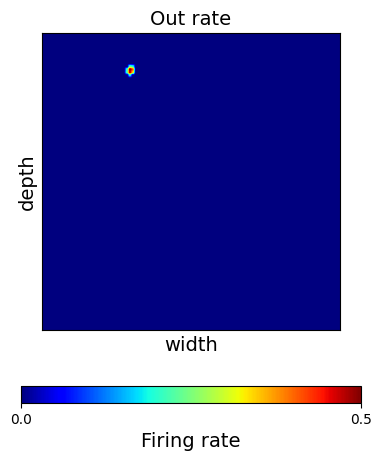

In [10]:
exc_eta = 1.3e-4
inh_eta = 5.3e-4
model_name = "model_example"
sigma_exc = np.array([0.05, 0.05])
sigma_inh = np.array([0.1, 0.1])
Ne = 4900
Ni = 1225
Nef = 1
Nif = 1
alpha_i = 1
alpha_e = 1
we_init = 1.0
wi_init = 1.51
agent_step_size = 1.0
agent = Weber2018(model_name=model_name, exc_eta=exc_eta, inh_eta=inh_eta, sigma_exc=sigma_exc,
                  sigma_inh=sigma_inh, Ne=Ne, Ni=Ni, agent_step_size=agent_step_size, ro=1,
                  Nef=Nef, Nif=Nif, room_width=env.room_width, room_depth=env.room_depth,
                  alpha_i=alpha_i, alpha_e=alpha_e, we_init=we_init, wi_init=wi_init)

agent.plot_rate_map()

Now, we update the parameters of the model using a training loop. Feel free to reduce the time of switch and merging, which gives less number of iterations as a results. To get nice results, run with these parameters and go for a cup of coffee (or two), as it is it will take around 30 minutes (depending on the machine you are using).

  0%|          | 0/324000 [00:00<?, ?it/s]

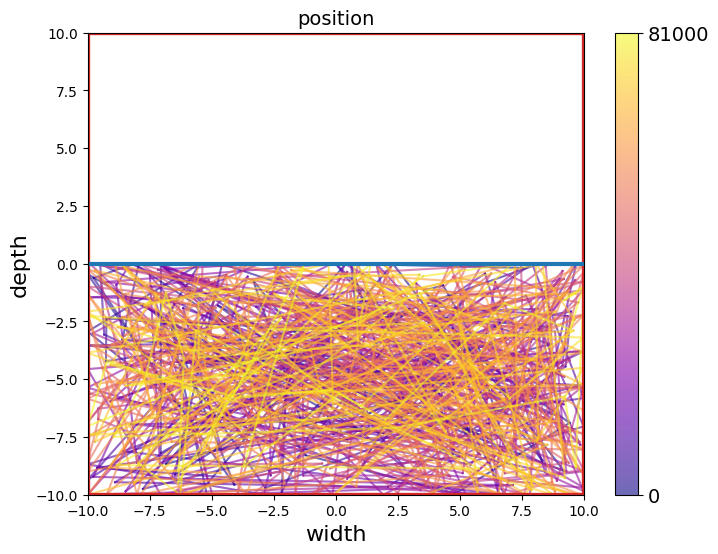

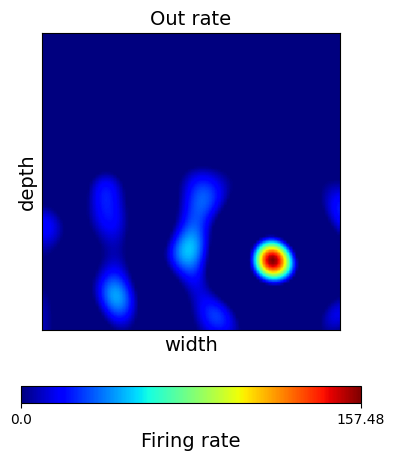

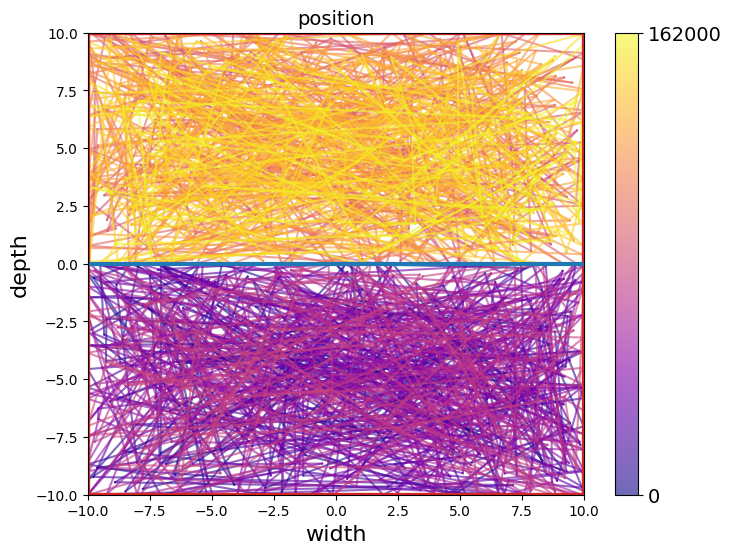

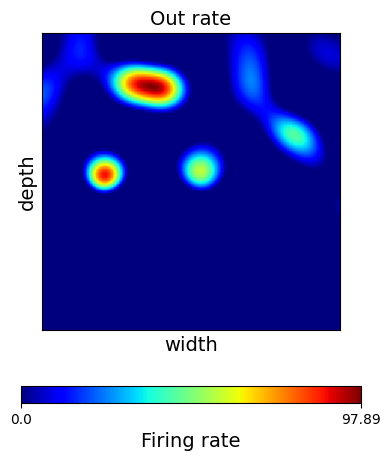

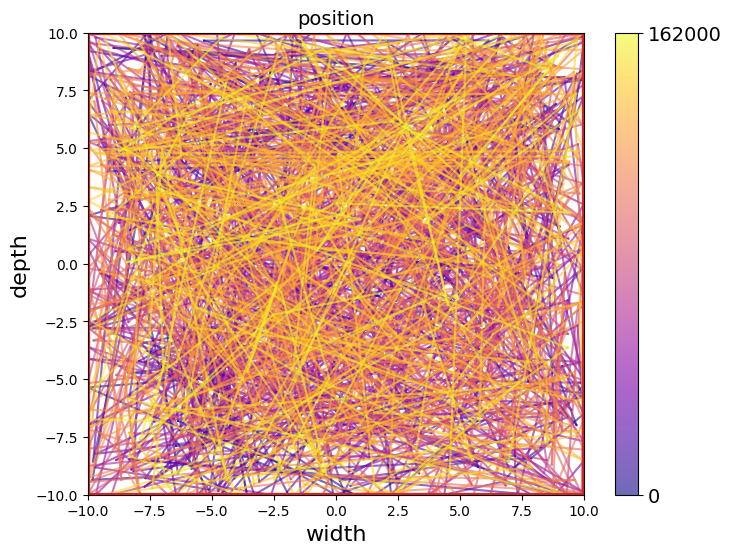

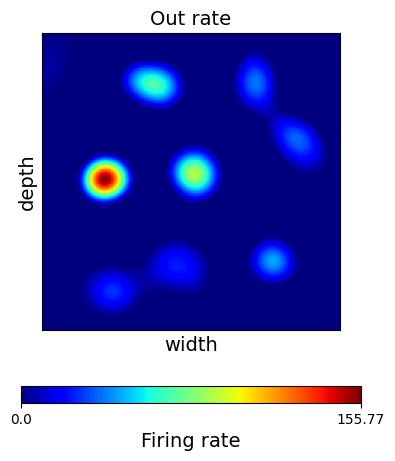

In [11]:
obs, state = env.reset()

for j in tqdm(range(round(n_steps))):
    # Observe to choose an action
    action = agent.act(obs)
    # Run environment for given action
    obs, state, reward = env.step(action)
    agent.update()
    # We plot the trajectory of the agent just right before switching and before merging
    # then we keep running the loop
    if j == int((switch_time*60)/time_step_size)-1:
        # plot trajectory
        ax = env.plot_trajectory(plot_every=100)
        ax.set_xlabel("width", fontsize=fontsize)
        ax.set_ylabel("depth", fontsize=fontsize)
        # If you like, you can save the current state of the agent using the save_agent method to load the agent later
        # agent.save_agent("pre_switch.agent")
        # plot rates
        agent.plot_rate_map()
        plt.savefig("pre_switch.pdf", bbox_inches="tight")
    if j == int((merging_time*60)/time_step_size)-1:
        # Same thing, plotting just before the merging of the rooms
        ax = env.plot_trajectory(plot_every=100)
        ax.set_xlabel("width", fontsize=fontsize)
        ax.set_ylabel("depth", fontsize=fontsize)
        agent.plot_rate_map()
        plt.savefig("pre_merge.pdf", bbox_inches="tight")
        # agent.save_agent("pre_merge.agent")

# Use the line below to save the agent and use it later        
# agent.save_agent("post_merge.agent")
# Here we take the section of interaction history for the period after the merge
merged_history = env.history[int((merging_time*60)/time_step_size):]
# Note that the wall is already removed from the arena structure
ax = env.plot_trajectory(history_data=merged_history, plot_every=100)
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)

agent.plot_rate_map()
plt.savefig("post_merge.pdf", bbox_inches="tight")


Ideally, you should see how some of the bombs in the rate map from each room also merge after removing the wall in between. This can be observed in the original dataset, which is also available in our package! Here we plot some of the rate maps before and after merging the rooms.

Subset of dataset wernle_2018 not available. Downloading the full dataset instead.
Dataframe with recordings


,session,recorded_vars,before_merge
rec_index,,,
0,0,"[time, posx, posy, speed_index, spikes, ratema...",False
1,0,"[time, posx, posy, speed_index, ratemap_dev]",True
2,1,"[time, posx, posy, speed_index, spikes, ratema...",False
3,1,"[time, posx, posy, speed_index, ratemap_dev]",True
4,2,"[time, posx, posy, speed_index, spikes, ratema...",False
...,...,...,...
289,125,ratemap,False
290,126,ratemap,True
291,126,ratemap,False


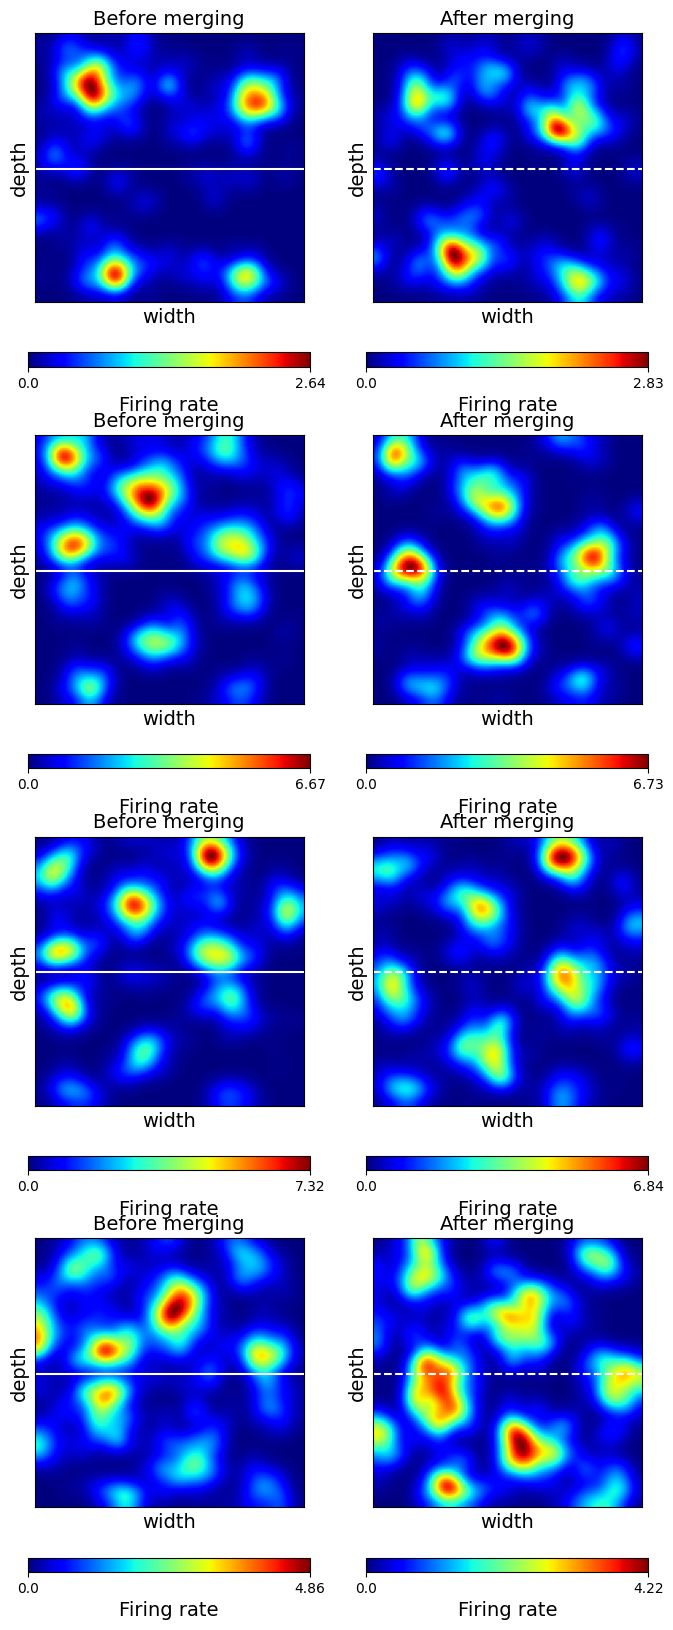

In [12]:
w_data = Wernle2018Data()
recording_list = w_data.show_data(full_dataframe=False)
rates = w_data.plot_merging_comparison(session_index=(100, 125, 126, 127))